In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from glob import glob
from dataclasses import dataclass

from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from lib import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

## Load

In [2]:
data = load("250321-exp3")

/Users/matteov/Developer/lab3/05-milieux-granulaires/analyse/lib.py:28: UserWarning: loadtxt: input contained no data: "../data/250321-exp3/250321-exp3_step12.txt"
  freq, psd, chi_abs, chi_im = np.loadtxt(file, skiprows=1, delimiter='\t', unpack=True)
/Users/matteov/Developer/lab3/05-milieux-granulaires/analyse/lib.py:28: UserWarning: loadtxt: input contained no data: "../data/250321-exp3/250321-exp3_step18.txt"
  freq, psd, chi_abs, chi_im = np.loadtxt(file, skiprows=1, delimiter='\t', unpack=True)


## Analysis

197
401


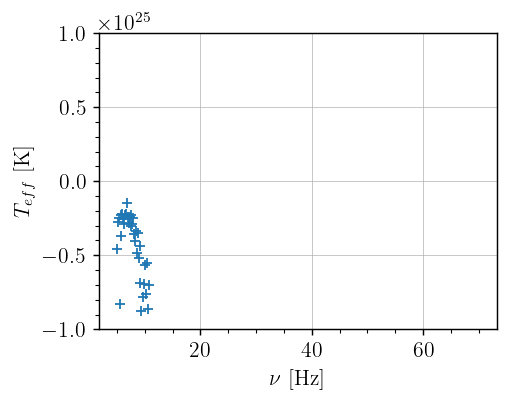

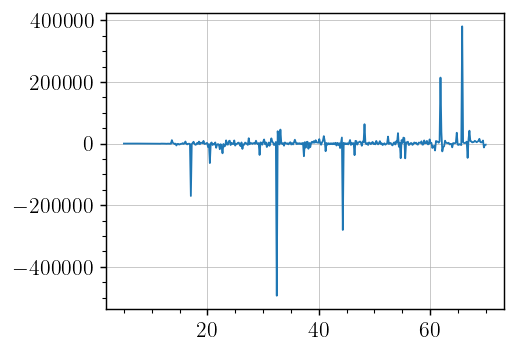

In [36]:
fig, ax = plt.subplots()
noise = data[-1].psd
step = data[2]

clean_psd = step.psd / noise

# cleaned_chi_im = np.convolve(step.chi_im, np.ones(step.chi_im.size)/step.chi_im.size, mode='same')
# cleaned_psd = np.convolve(step.psd, np.ones(step.psd.size)/step.psd.size, mode='same')

kB_Teff = (clean_psd * 2*np.pi*step.freqs) / (4 * step.chi_im)
Teff = kB_Teff/ BOLTZMANN_CONSTANT_JOULE

print(np.sum(kB_Teff > 0))
print(Teff.size)

ax.scatter(step.freqs, Teff)
plt.ylim(-1e25,1e25)
plt.xlabel("$\\nu$ [Hz]")
plt.ylabel("$T_{eff}$ [K]")

plt.show()

plt.plot(step.freqs, kB_Teff)

plt.show()
